PREPINSTA DATA ANALYTICS INTERNSHIP CAPSTONE PROJECT

DONE BY SRIJA BASAK

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
dfWeight=pd.read_csv('/content/weightLogInfo_merged.csv')

In [14]:
dfWeight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [15]:
dfWeight.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [16]:
dfWeight.shape

(67, 8)

In [21]:
#dropping 'Fat' column as it contains too many null values
#No. of rows in dataset is 67 and 'Fat' column has 65 null values
dfWeight.drop(columns=['Fat'],inplace=True)

In [22]:
dfWeight.isnull().sum()

Id                0
Date              0
WeightKg          0
WeightPounds      0
BMI               0
IsManualReport    0
LogId             0
dtype: int64

In [23]:
dfWeight

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,21.690001,True,1463097599000
...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,25.559999,False,1462949507000


In [45]:

# Define a function to map BMI values to weight conditions
def categorize_weight_condition(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Healthy Weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

# Apply the function to create the new 'Weight Condition' column
dfWeight['Weight Condition'] = dfWeight['BMI'].apply(categorize_weight_condition)



            Id                   Date    WeightKg  WeightPounds        BMI  \
0   1503960366   5/2/2016 11:59:59 PM   52.599998    115.963147  22.650000   
1   1503960366   5/3/2016 11:59:59 PM   52.599998    115.963147  22.650000   
2   1927972279   4/13/2016 1:08:52 AM  133.500000    294.317120  47.540001   
3   2873212765  4/21/2016 11:59:59 PM   56.700001    125.002104  21.450001   
4   2873212765  5/12/2016 11:59:59 PM   57.299999    126.324875  21.690001   
..         ...                    ...         ...           ...        ...   
62  8877689391    5/6/2016 6:43:35 AM   85.000000    187.392923  25.440001   
63  8877689391    5/8/2016 7:35:53 AM   85.400002    188.274775  25.559999   
64  8877689391    5/9/2016 6:39:44 AM   85.500000    188.495234  25.610001   
65  8877689391   5/11/2016 6:51:47 AM   85.400002    188.274775  25.559999   
66  8877689391   5/12/2016 6:42:53 AM   84.000000    185.188300  25.139999   

    IsManualReport          LogId Weight Condition  
0         

In [46]:
dfWeight.head()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId,Weight Condition
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462233599000,Healthy Weight
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462319999000,Healthy Weight
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,47.540001,False,1460509732000,Obesity
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,21.450001,True,1461283199000,Healthy Weight
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,21.690001,True,1463097599000,Healthy Weight


In [47]:
dfWeight['Weight Condition'].value_counts()

Healthy Weight    34
Overweight        32
Obesity            1
Name: Weight Condition, dtype: int64

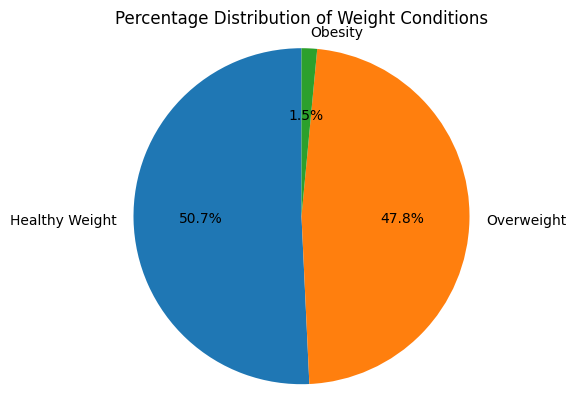

In [50]:
weight_condition_counts=dfWeight['Weight Condition'].value_counts()
plt.pie(weight_condition_counts, labels=weight_condition_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage Distribution of Weight Conditions')
plt.show()


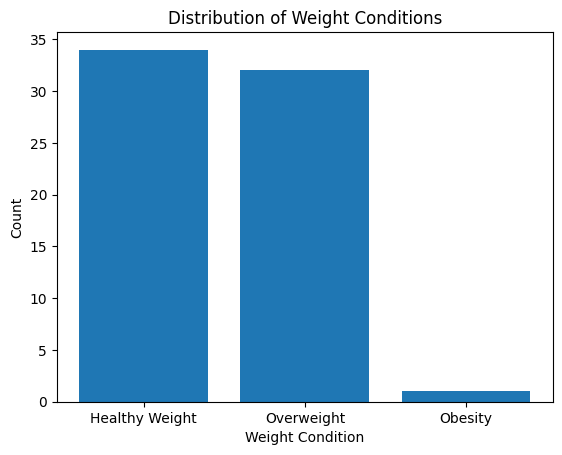

In [51]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
weight_condition_counts = dfWeight['Weight Condition'].value_counts()

plt.bar(weight_condition_counts.index, weight_condition_counts.values)
plt.xlabel('Weight Condition')
plt.ylabel('Count')
plt.title('Distribution of Weight Conditions')
plt.show()


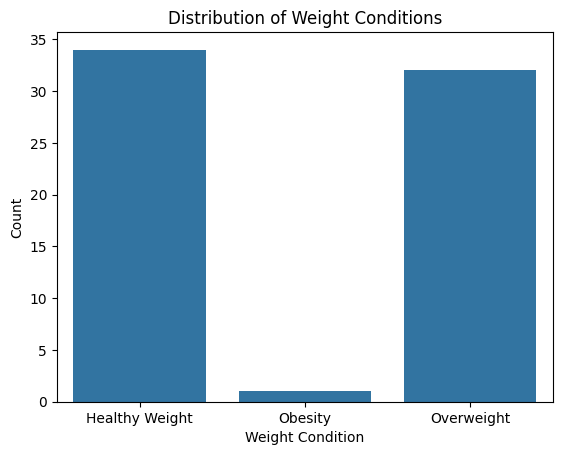

In [53]:
import seaborn as sns

sns.countplot(x='Weight Condition', data=dfWeight)
plt.xlabel('Weight Condition')
plt.ylabel('Count')
plt.title('Distribution of Weight Conditions')
plt.show()


In [54]:
dfSleep=pd.read_csv('/content/sleepDay_merged.csv')

In [55]:
dfSleep.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [56]:
dfSleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [57]:
dfSleep.shape

(413, 5)

In [58]:
dfSleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


ANIMATION PLOT TO SHOW Total Minutes Asleep vs Total Time in Bed

In [59]:
import plotly.express as px
px.scatter(dfSleep,x='TotalMinutesAsleep',y='TotalTimeInBed',animation_frame='SleepDay',animation_group="Id",color='Id',hover_name='Id',
           range_x=[50,800], range_y=[50,1000])